# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

#Import the OpenWeatherMap API key
from api_keys import weather_api_key

#Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
#Empty list for holding the latitude and longitude combinations
lat_lngs = []

#Empty list for holding the cities names
cities = []

#Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

#Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
#Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

#Define an empty list to fetch the weather data for each city
city_data = []

#Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1
        
#Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    #Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key + "&units="
    
    #Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    #Add 1 to the record count
    record_count += 1

    #Run an API request for each of the cities
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        #Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]['country']
        city_date = city_weather["dt"]

        #Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    #If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
#Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mokhsogollokh
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | karukh
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | papatowai
Processing Record 7 of Set 1 | taiohae
City not found. Skipping...
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | constantia
Processing Record 10 of Set 1 | akureyri
Processing Record 11 of Set 1 | afaahiti
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | suva
Processing Record 16 of Set 1 | kotlas
Processing Record 17 of Set 1 | usogorsk
Processing Record 18 of Set 1 | kapit
Processing Record 19 of Set 1 | hassi messaoud
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | gant

Processing Record 38 of Set 4 | huarmey
Processing Record 39 of Set 4 | princeville
Processing Record 40 of Set 4 | kodiak
Processing Record 41 of Set 4 | sinabang
Processing Record 42 of Set 4 | isabela
Processing Record 43 of Set 4 | namie
Processing Record 44 of Set 4 | camana
Processing Record 45 of Set 4 | shitanjing
Processing Record 46 of Set 4 | kiruna
Processing Record 47 of Set 4 | ribeira brava
Processing Record 48 of Set 4 | inarajan village
Processing Record 49 of Set 4 | ziro
Processing Record 0 of Set 5 | hilo
Processing Record 1 of Set 5 | vorgashor
Processing Record 2 of Set 5 | filey
Processing Record 3 of Set 5 | lata
Processing Record 4 of Set 5 | chibougamau
Processing Record 5 of Set 5 | hadibu
Processing Record 6 of Set 5 | yebaishou
Processing Record 7 of Set 5 | san julian
Processing Record 8 of Set 5 | fortaleza
Processing Record 9 of Set 5 | buka
Processing Record 10 of Set 5 | assab
Processing Record 11 of Set 5 | ouarzazat
Processing Record 12 of Set 5 | ud

Processing Record 29 of Set 8 | novo aripuana
Processing Record 30 of Set 8 | tranovaho
City not found. Skipping...
Processing Record 31 of Set 8 | yung shue wan
Processing Record 32 of Set 8 | nova vicosa
Processing Record 33 of Set 8 | ulladulla
Processing Record 34 of Set 8 | cabo san lucas
Processing Record 35 of Set 8 | arraial do cabo
Processing Record 36 of Set 8 | biltine
Processing Record 37 of Set 8 | remire-montjoly
Processing Record 38 of Set 8 | rongelap
Processing Record 39 of Set 8 | sitangkai
Processing Record 40 of Set 8 | manado
Processing Record 41 of Set 8 | 'ohonua
City not found. Skipping...
Processing Record 42 of Set 8 | freetown
Processing Record 43 of Set 8 | valparaiso
Processing Record 44 of Set 8 | barotac viejo
Processing Record 45 of Set 8 | cacapava do sul
Processing Record 46 of Set 8 | yangjiang
Processing Record 47 of Set 8 | mccook
Processing Record 48 of Set 8 | viseu
Processing Record 49 of Set 8 | grants
Processing Record 0 of Set 9 | arenapolis
P

Processing Record 19 of Set 12 | abepura
Processing Record 20 of Set 12 | san pedro pochutla
Processing Record 21 of Set 12 | santa rosalia
Processing Record 22 of Set 12 | iranshahr
Processing Record 23 of Set 12 | al quwayrah
Processing Record 24 of Set 12 | fort st. john
Processing Record 25 of Set 12 | marsala
Processing Record 26 of Set 12 | andkhoy
Processing Record 27 of Set 12 | port alfred
Processing Record 28 of Set 12 | alghero
Processing Record 29 of Set 12 | vrangel'
Processing Record 30 of Set 12 | moires
Processing Record 31 of Set 12 | reyes
Processing Record 32 of Set 12 | smithers
Processing Record 33 of Set 12 | lospalos
Processing Record 34 of Set 12 | bubaque
Processing Record 35 of Set 12 | alliance
Processing Record 36 of Set 12 | timbuktu
-----------------------------
Data Retrieval Complete      
-----------------------------


In [10]:
#Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

#Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [11]:
#Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mokhsogollokh,61.4681,128.9203,292.15,72,81,2.51,RU,1690064132
1,waitangi,-43.9535,-176.5597,284.72,96,100,4.02,NZ,1690064563
2,ribeira grande,38.5167,-28.7000,294.69,87,22,2.68,PT,1690064588
3,karukh,34.4811,62.5863,295.81,24,0,5.70,AF,1690064589
4,port elizabeth,-33.9180,25.5701,285.31,82,0,4.12,ZA,1690064564


In [12]:
#Export the City_Data into a csv
city_data_df.to_csv("Output_Data/cities.csv", index_label="City_ID")

In [17]:
#Read saved data
city_data_df = pd.read_csv("Output_Data/cities.csv", index_col="City_ID")

#Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mokhsogollokh,61.4681,128.9203,292.15,72,81,2.51,RU,1690064132
1,waitangi,-43.9535,-176.5597,284.72,96,100,4.02,NZ,1690064563
2,ribeira grande,38.5167,-28.7000,294.69,87,22,2.68,PT,1690064588
3,karukh,34.4811,62.5863,295.81,24,0,5.70,AF,1690064589
4,port elizabeth,-33.9180,25.5701,285.31,82,0,4.12,ZA,1690064564


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

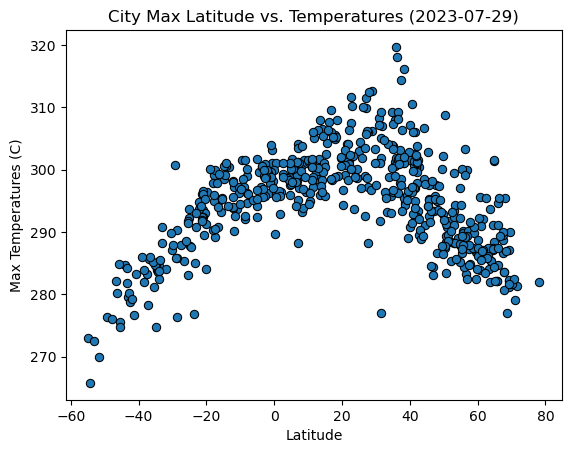

In [25]:
#Build scatter plot for latitude vs. Temperature
plt.plot(city_data_df["Lat"],
         city_data_df["Max Temp"],
         linestyle = "none",
         marker="o",
         markeredgecolor="black",
         markeredgewidth=0.75)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperatures (C)")
plt.title("City Max Latitude vs. Temperatures (2023-07-29)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

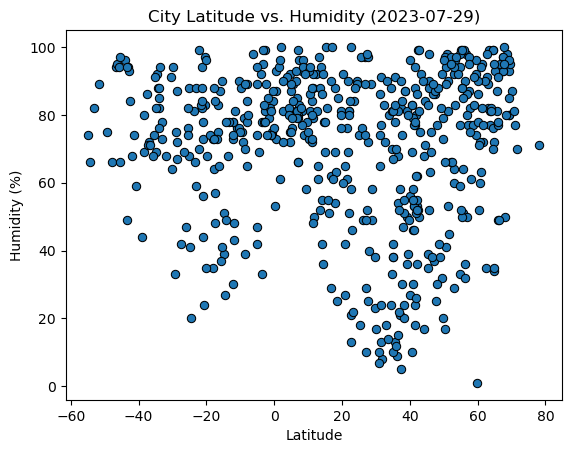

In [29]:
#Build the scatter plots for latitude vs. Humidity
plt.plot(city_data_df["Lat"],
         city_data_df["Humidity"],
         linestyle = "none",
         marker="o",
         markeredgecolor="black",
         markeredgewidth=0.75)

#Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-07-29)")

#Save the figure
plt.savefig("output_data/Fig2.png")

#Show plot
plt.show()

#### Latitude Vs. Cloudiness

In [ ]:
#Build the scatter plots for latitude vs. Cloudiness
# YOUR CODE HERE

#Incorporate the other graph properties
# YOUR CODE HERE

#Save the figure
plt.savefig("output_data/Fig3.png")

#Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [ ]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE